In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [11]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [12]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [13]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [14]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [15]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

class needs to be balanced .

<AxesSubplot:xlabel='Income', ylabel='count'>

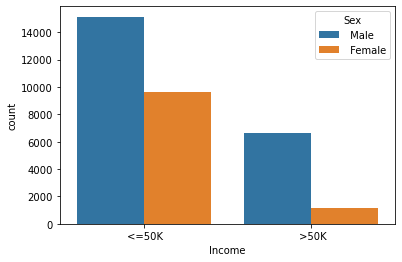

In [16]:
sns.countplot(df['Income'], hue='Sex', data=df)

Males have income than females.

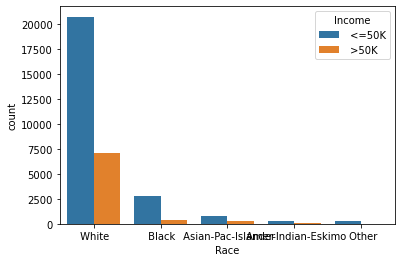

In [17]:
sns.countplot(df['Race'], hue='Income', data=df);

White race have maximum income

In [18]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [19]:
df['Workclass'] = df['Workclass'].replace('?', 'Private')
df['Native_country'] = df['Native_country'].replace('?', 'United-States')
df['Occupation'] = df['Occupation'].replace('?', 'Prof-specialty')

replaced ? wit thier respective values.

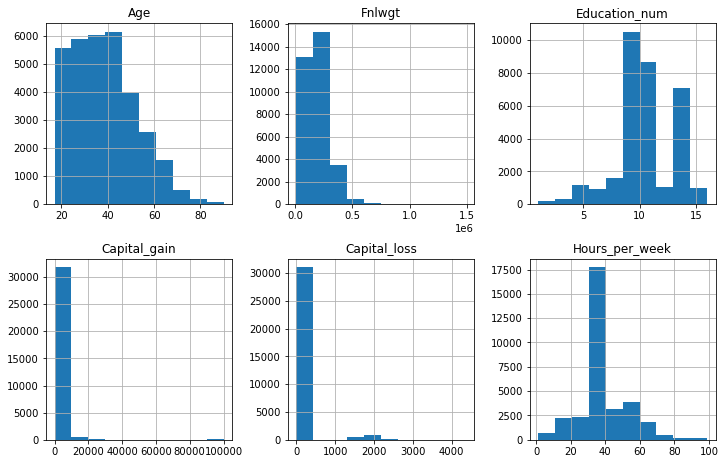

In [20]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

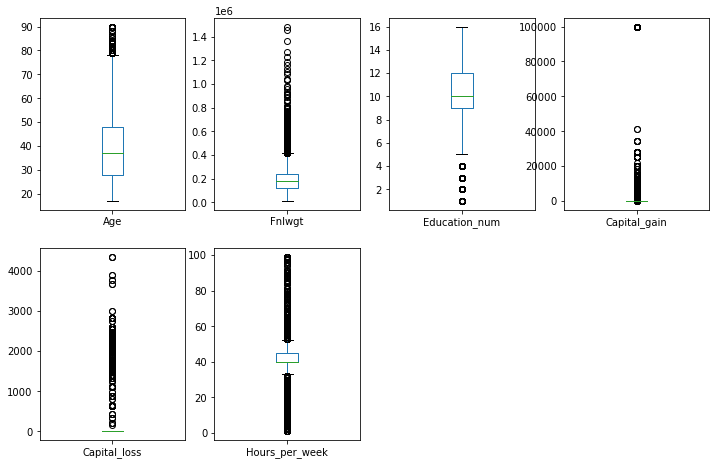

In [21]:
df.plot(kind = 'box',  figsize=(12,12), layout=(3,4), sharex=False, subplots = True);

outliers are clearly visible from the above hist and box plots. This needs to be treated.

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()
df.Workclass = le.fit_transform(df.Workclass)
df.Education = le.fit_transform(df.Education)
df.Marital_status = le.fit_transform(df.Marital_status)
df.Occupation = le.fit_transform(df.Occupation)
df.Relationship = le.fit_transform(df.Relationship)
df.Race = le.fit_transform(df.Race)
df.Native_country = le.fit_transform(df.Native_country)
df.Income = le.fit_transform(df.Income)
df.Sex = le.fit_transform(df.Sex)

In [24]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


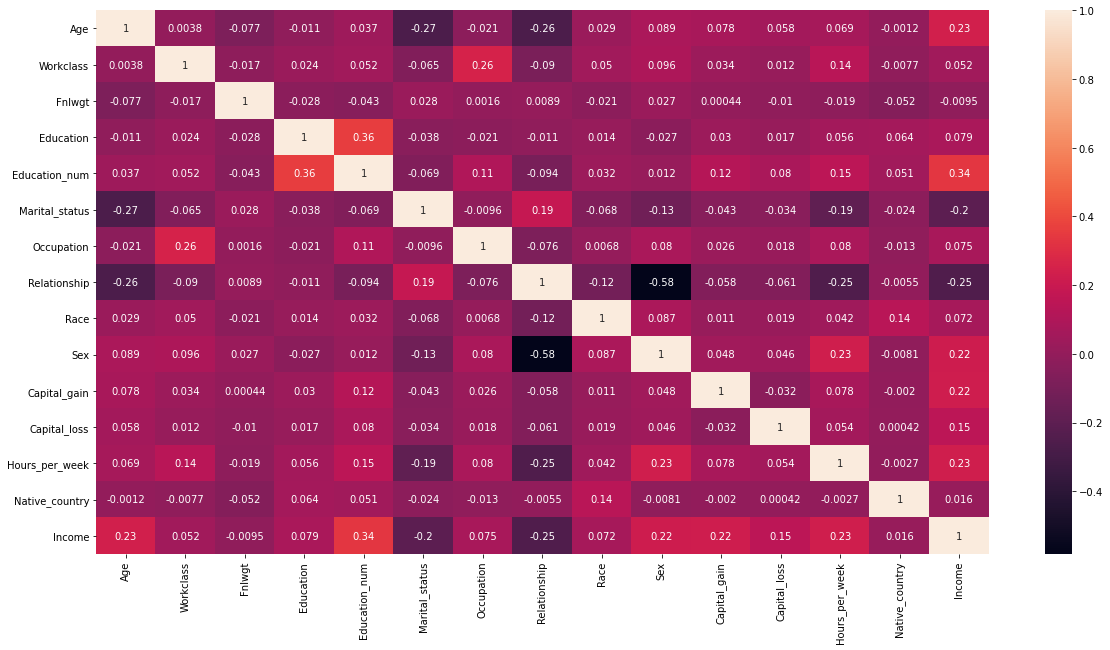

In [25]:
plt.figure(figsize= (20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [26]:
corr_matrix = df.corr()
corr_matrix["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

Columns like Fnlwgt and Native_country are least correlated.

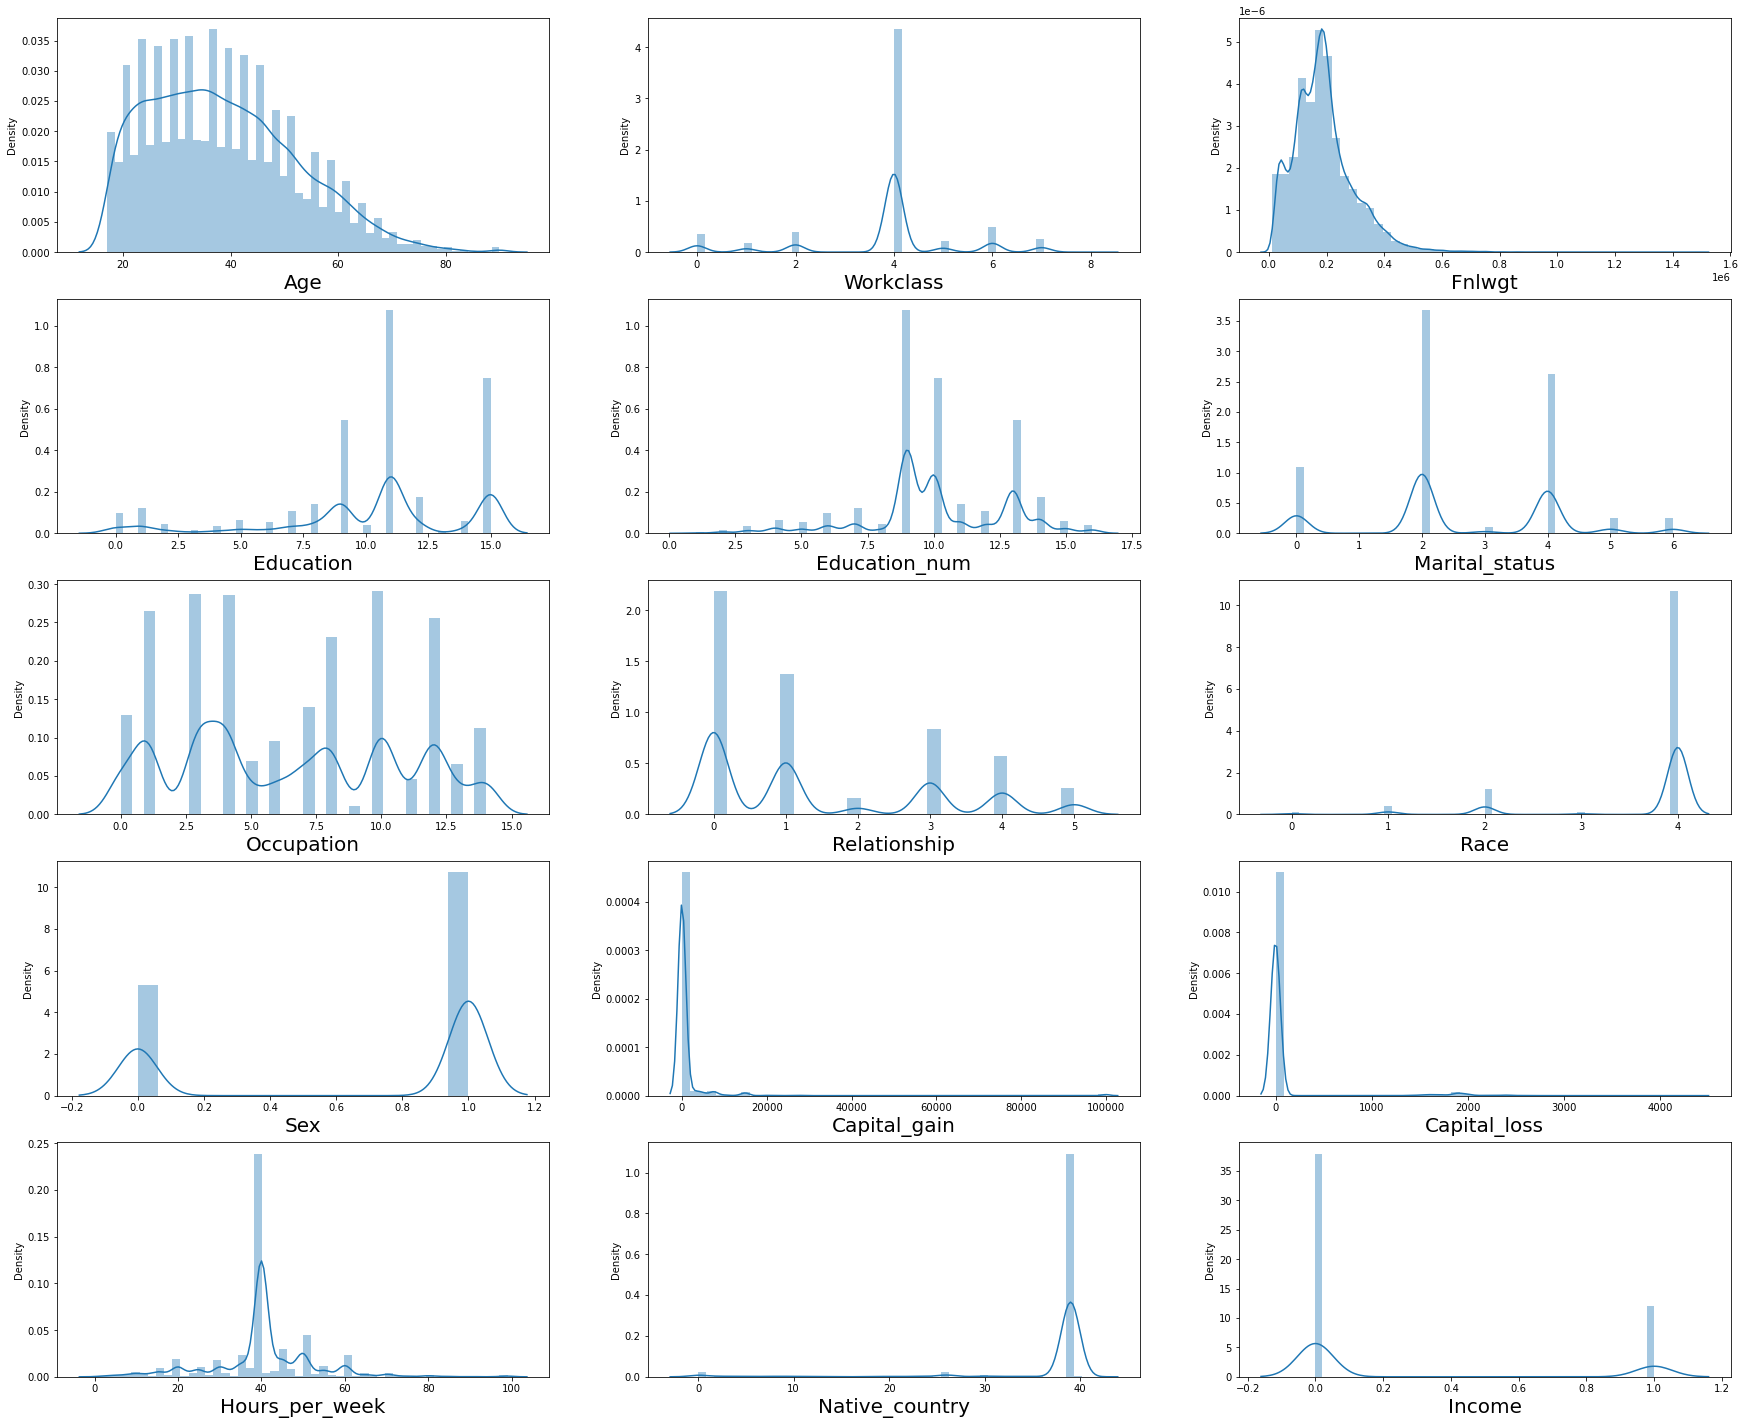

In [27]:
plt.figure(figsize = (30,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
       ax = plt.subplot(5,3, plotnumber)
       sns.distplot(df[column])
       plt.xlabel(column, fontsize =20)
    
    plotnumber+=1
    
plt.show()

In [28]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Skewness are present in continous coloumns like Capital_gain and Capital_loss. So applying boxcox transformation technique.

In [29]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

In [30]:
import scipy.stats as stats

In [31]:
df['Capital_gain'], param = stats.boxcox(df.Capital_gain+1)

In [32]:
df['Capital_loss'], param = stats.boxcox(df.Capital_gain+1)

In [33]:
df.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      3.016951
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

In [34]:
y = df['Income']
X = df.drop(columns = ['Income'])

In [35]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

In [36]:
y.value_counts()

1    24719
0    24719
Name: Income, dtype: int64

Class is balanced now.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
       maxAccu=acc
       maxRS = i
print ("Best accuracy is", maxAccu, "on Random_state", maxRS)

Best accuracy is 0.7779935275080906 on Random_state 115


In [40]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = maxRS)

In [41]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7779935275080906
[[4728 1489]
 [1255 4888]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      6217
           1       0.77      0.80      0.78      6143

    accuracy                           0.78     12360
   macro avg       0.78      0.78      0.78     12360
weighted avg       0.78      0.78      0.78     12360



In [42]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt = DT.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8502427184466019
[[5228  989]
 [ 862 5281]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      6217
           1       0.84      0.86      0.85      6143

    accuracy                           0.85     12360
   macro avg       0.85      0.85      0.85     12360
weighted avg       0.85      0.85      0.85     12360



In [43]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8932847896440129
[[5572  645]
 [ 674 5469]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6217
           1       0.89      0.89      0.89      6143

    accuracy                           0.89     12360
   macro avg       0.89      0.89      0.89     12360
weighted avg       0.89      0.89      0.89     12360



In [44]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8932847896440129
[[5572  645]
 [ 674 5469]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6217
           1       0.89      0.89      0.89      6143

    accuracy                           0.89     12360
   macro avg       0.89      0.89      0.89     12360
weighted avg       0.89      0.89      0.89     12360



In [45]:
from sklearn.model_selection import cross_val_score

rwr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of LogisticRegression model :", rwr.mean())

Cross validation score of LogisticRegression model : 0.6485484682412883


In [46]:
rwr=cross_val_score(DT, X, y, cv=5)
print("Cross validation score of DecisionTree model :", rwr.mean())

Cross validation score of DecisionTree model : 0.8479730788001504


In [47]:
rwr=cross_val_score(rf, X, y, cv=5)
print("Cross validation score of RandomForest model :", rwr.mean())

Cross validation score of RandomForest model : 0.8817124894806458


In [48]:
rwr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of SVC model :", rwr.mean())

Cross validation score of SVC model : 0.6485484682412883


In [49]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [50]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)

print("All models are trained")

All models are trained


In [51]:
LR.score(x_test,y_test)
DT.score(x_test,y_test)
rf.score(x_test,y_test)
svc.score(x_test,y_test)

print("All models test scores captured")

All models test scores captured


In [52]:
roc_auc_score(y_test,LR.predict(x_test))

0.7780989206601938

In [53]:
roc_auc_score(y_test,DT.predict(x_test))

0.8506409135694714

In [54]:
roc_auc_score(y_test,rf.predict(x_test))

0.8932833863531988

In [55]:
roc_auc_score(y_test,svc.predict(x_test))

0.8526166261392629

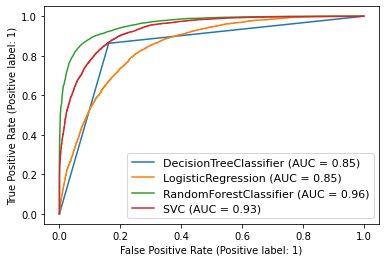

In [56]:
disp=plot_roc_curve(DT,x_test,y_test)

plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [200, 800], 
              'max_features': ['auto', 'sqrt'],
              'max_depth': [4,6,8],
              'criterion': ['entropy']}

In [58]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs=-1)

In [60]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 800]})

In [61]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 800}

In [62]:
model=RandomForestClassifier(criterion= 'entropy',
 max_depth= 8,
 max_features= 'auto',
 n_estimators= 800)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

86.27022653721683


Since, my RandomForest model is giving accuracy and cross validation as 86%. It shows the model is. performimg well.

In [63]:
import pickle
filename = 'census.pkl'
pickle.dump(rf, open(filename, 'wb'))